In [1]:
import numpy as np
import pandas as pd
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO, MCMC, NUTS

import torch
from torch.distributions import constraints

import matplotlib.pyplot as plt
import seaborn as sns

import graphviz


In [18]:
def beamProperties():
        beam = {"length": 0.301,
            "width": 0.026,
            "thickness": 0.003,
            
            "E": 10e11,
            
            "mass": 0.1877
            }

        beam["massPerUnit"] = beam["mass"] / beam["length"]
        beam["volume"] = beam["length"] * beam["width"] * beam["thickness"]
        beam["I"] = beam["width"]*beam["thickness"]**3/12
        return beam

def mobilityFuncModel(E, eta=0.1):
    beam = beamProperties()
    l = beam["length"]/2

    w = 2*np.pi*freq
    B = E*beam["I"]
    complex_B = E*(1+1j*eta)*beam["I"]
    cb = np.sqrt(w)*(B/beam["massPerUnit"])**(1/4)
    kl = w/cb*l

    complex_kl = kl*(1-1j*eta/4)
    
    N_l = np.cos(complex_kl)*np.cosh(complex_kl) + 1
    D_l = np.cos(complex_kl)*np.sinh(complex_kl) + np.sin(complex_kl)*np.cosh(complex_kl)

    #Y = -(0.25*eta+1j)*l/(2*kl*np.sqrt(B*beam["massPerUnit"])) * N_l/D_l
    Y = abs(-1j*l/ (2*complex_kl*np.sqrt(complex_B*beam["massPerUnit"])) * N_l/D_l)
    #Y = Y/max(Y)
    return Y

In [21]:
beam = beamProperties()

experiment = pd.read_csv("./Data/bend/centerFreqResponse.csv")[20:]
Y_exp = abs(experiment["force"].values + 1j*experiment["velocity"].values)
Y_exp_norm = (Y_exp - Y_exp.mean()) / Y_exp.std()
freq = experiment["freq"].values
Y_theo = mobilityFuncModel(10e10)
Y_theo_norm = (Y_theo - Y_theo.mean()) / Y_theo.std()
freq = experiment["freq"].values

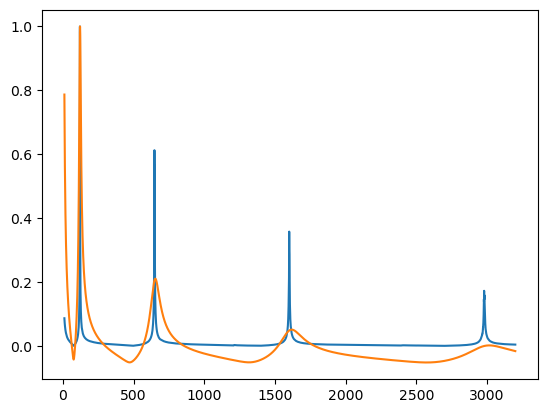

In [24]:
plt.plot(freq, Y_exp/max(Y_exp))
plt.plot(freq, Y_theo_norm/max(Y_theo_norm))